# Chronic Kidney Disease

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\Healthcare Domain\kidney_disease.csv')

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Duplication check 

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

## Information 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## Find NULL value 

In [8]:
df.isnull().sum().sum()

1009

In [9]:
df.isnull().sum()/len(df) * 100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

## Find the Unique value in DF

In [10]:
for i in df.columns:
    print("*********************        ",i,"           ***************************")
    print()
    print(set(df[i]))
    print()

*********************         id            ***************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 2

## Data Cleaning / Data Clunging / Data Wrangling (Data Analytical Approch)

In [11]:
df['classification'] = df['classification'].apply(lambda x: 'ckd' if x== 'ckd\t' else x)
df['cad'] = df['cad'].apply(lambda x: 'no' if x== '\tno' else x)
df['dm'] = df['dm'].apply(lambda x: 'yes' if x== '\tyes' else x)
df['dm'] = df['dm'].apply(lambda x: 'yes' if x== ' yes' else x)
df['dm'] = df['dm'].apply(lambda x: 'no' if x== '\tno' else x)

In [12]:
df['rc'] = df['rc'].apply(lambda x: df['rc'].mode()[0] if x == '\t?' else x)

In [13]:
df['wc'] = df['wc'].apply(lambda x: '8400' if x== '\t8400' else x)
df['wc'] = df['wc'].apply(lambda x: '6200' if x== '\t6200' else x)
df['wc'] = df['wc'].apply(lambda x: df['wc'].mode()[0] if x== '\t?' else x)

In [14]:
df['pcv'] = df['pcv'].apply(lambda x: '43' if x== '\t43' else x)
df['pcv'] = df['pcv'].apply(lambda x: df['pcv'].mode()[0] if x== '\t?' else x)

### After Data Cleaning 

In [15]:
for i in df.columns:
    print("*********************        ",i,"           ***************************")

    print()
    print(set(df[i]))
    print()

*********************         id            ***************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 2

## Changing the Wrongly Classified data into numeric 

In [16]:
df['pcv'] = df['pcv'].astype('Int64')
df['wc'] = df['wc'].astype('Int64')
df['rc'] = df['rc'].astype('Float64')

In [17]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 Int64
wc                  Int64
rc                Float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

## Bifurcation variable into category(object) and numeric

In [18]:
object_column = df.select_dtypes(include='object').columns
numeric_column = df.select_dtypes(include=['int64' , 'Float64']).columns

In [19]:
print('Numeric COlumn ' , numeric_column)
print()
print('Object  COlumn ' , object_column)

Numeric COlumn  Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')

Object  COlumn  Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')


## NULL value Treatement (SimpleImputer)

In [20]:
from sklearn.impute import SimpleImputer
imputer_categroy = SimpleImputer(missing_values=np.nan , strategy='most_frequent')
imputer_numeric = SimpleImputer(missing_values=np.nan , strategy='median')

In [21]:
df_imp1 = pd.DataFrame(imputer_categroy.fit_transform(df[object_column]) , columns=object_column)
df_imp2 = pd.DataFrame(imputer_numeric.fit_transform(df[numeric_column]) , columns=numeric_column)

In [22]:
df_imp1.isnull().sum().sum() , df_imp2.isnull().sum().sum()

(0, 0)

In [23]:
df_imp1.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [24]:
df_imp2.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,1.0,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6


### id not required in df_imp2

In [25]:
df_imp2.drop(columns=['id'] , inplace=True)

In [26]:
df_imp2.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6


## Checking Outlier 

In [27]:
def distplots(col):
    plt.title(col)
    sns.distplot(df_imp2[col])
    plt.tight_layout()
    plt.show()

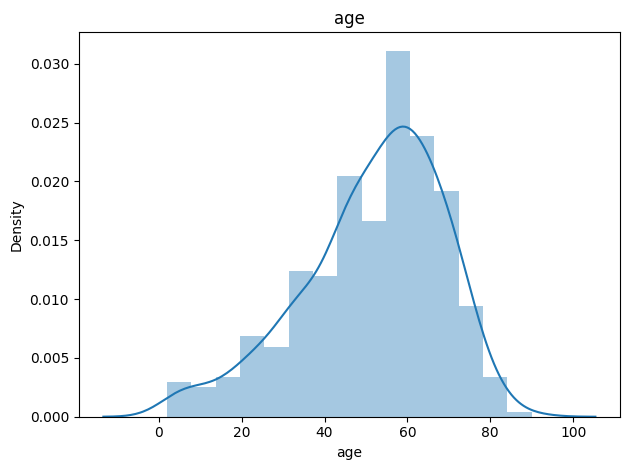

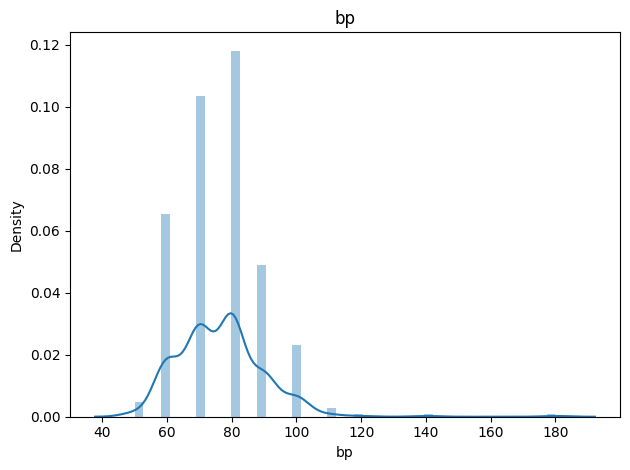

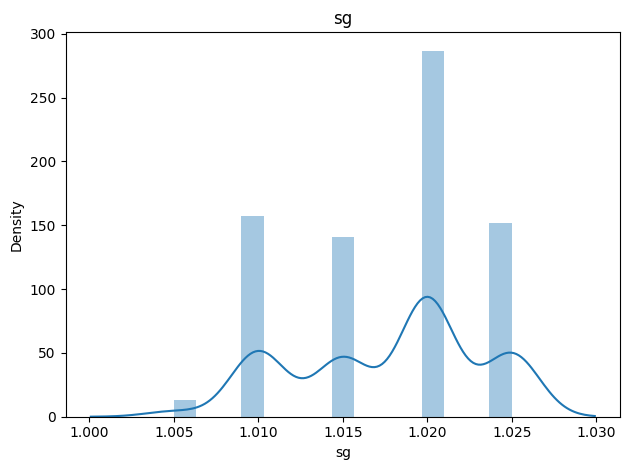

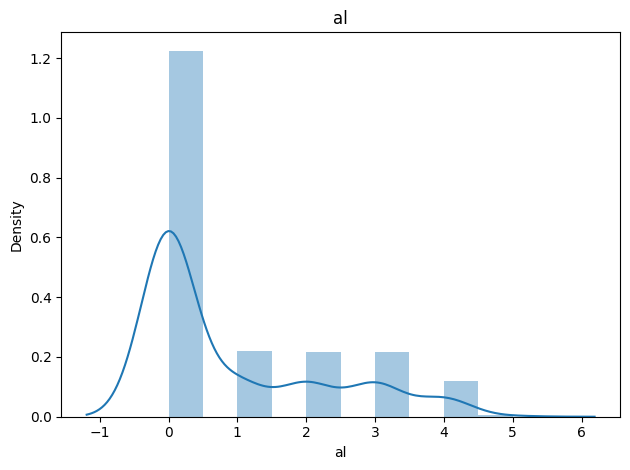

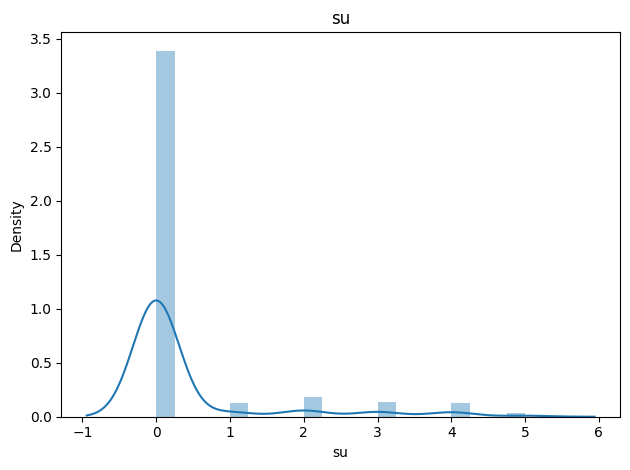

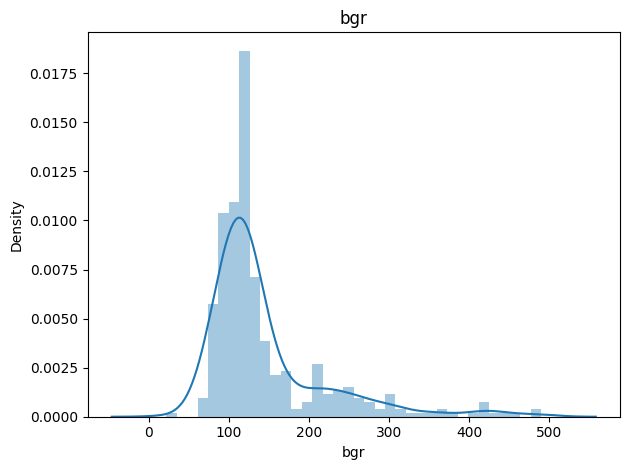

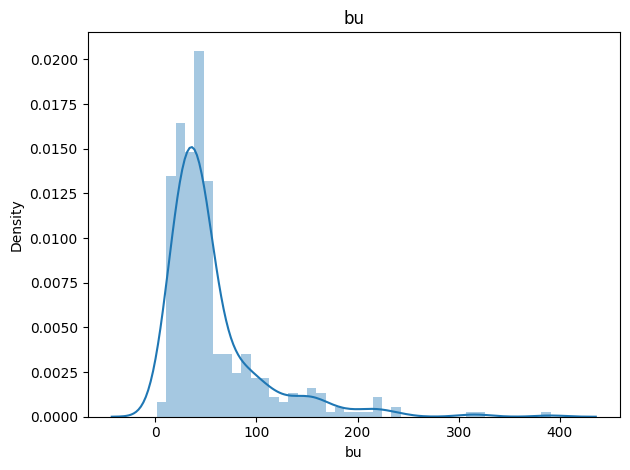

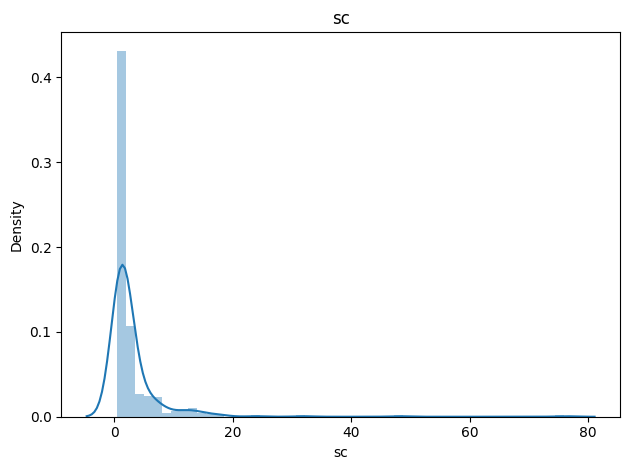

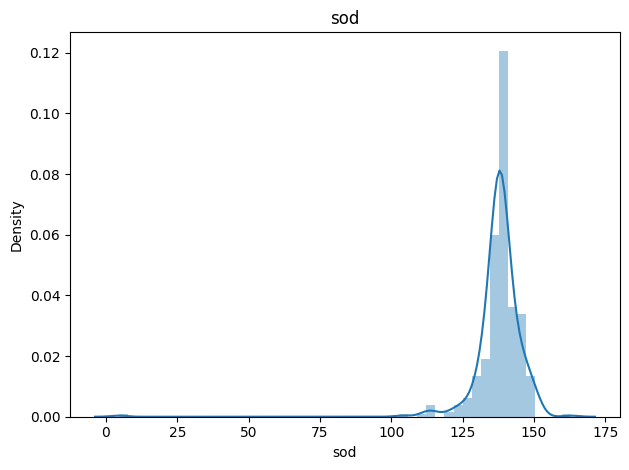

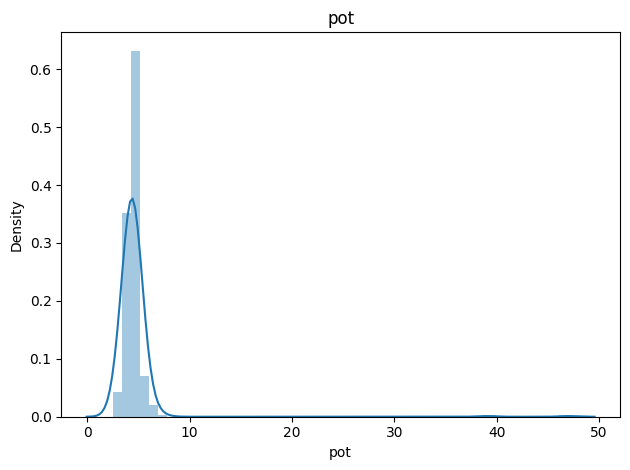

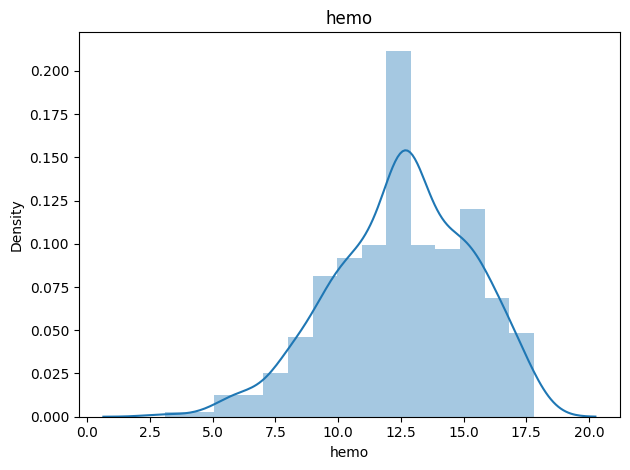

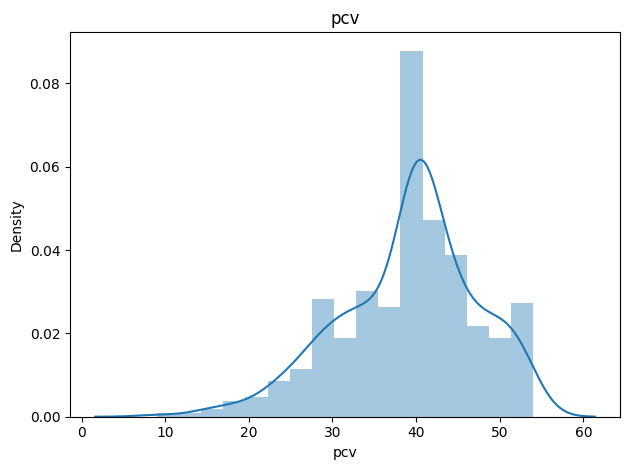

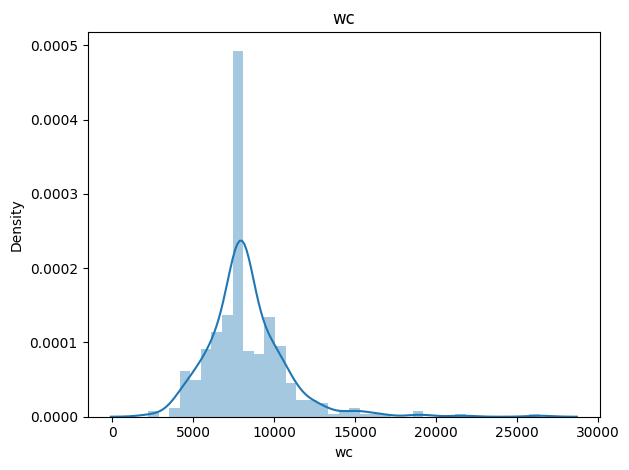

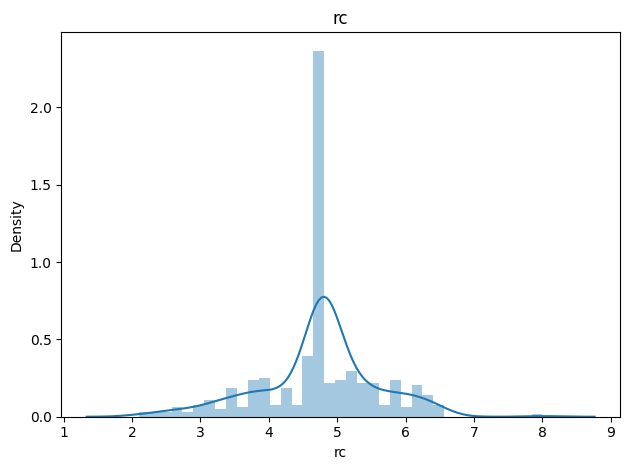

In [28]:
for i in df_imp2.columns:
    distplots(i)

In [29]:
def boxplots(col):
    plt.title(col)
    sns.boxplot(x=df_imp2[col])
    plt.tight_layout()
    plt.show()

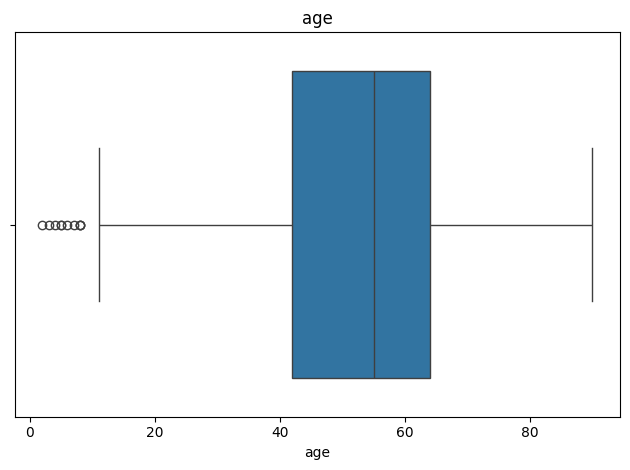

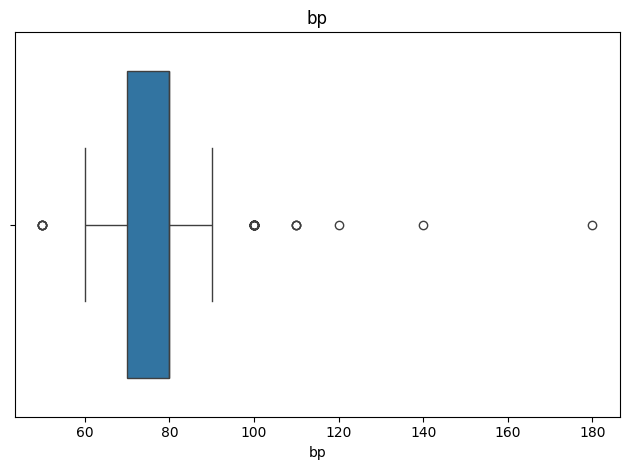

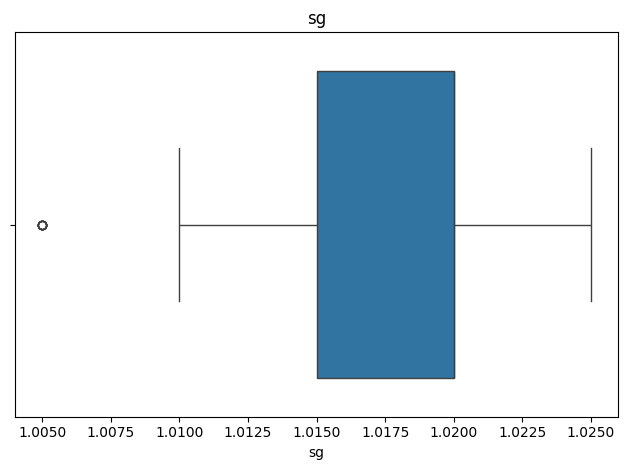

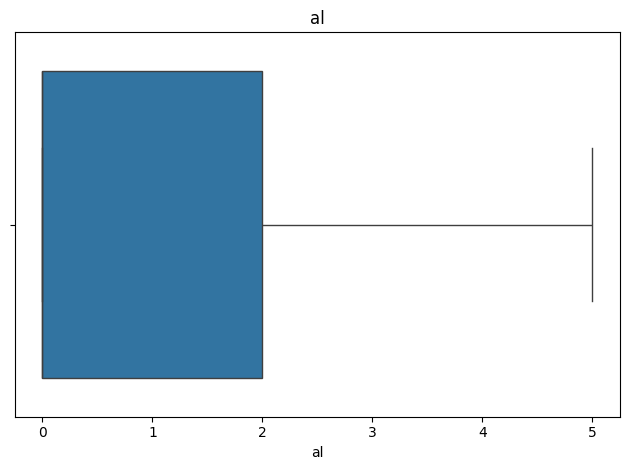

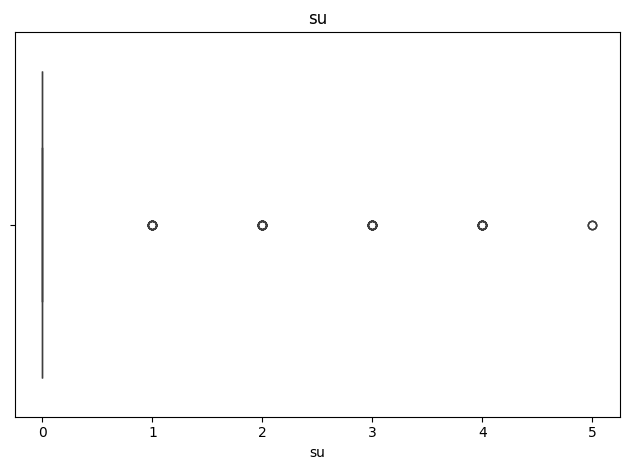

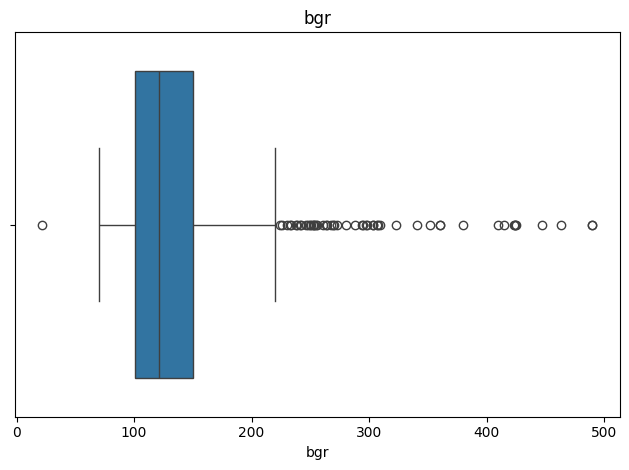

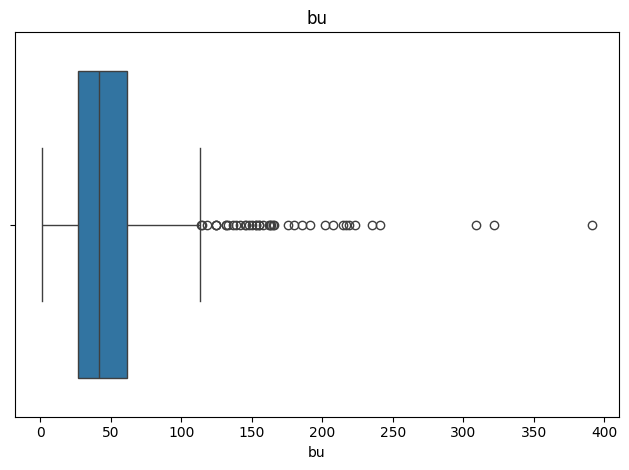

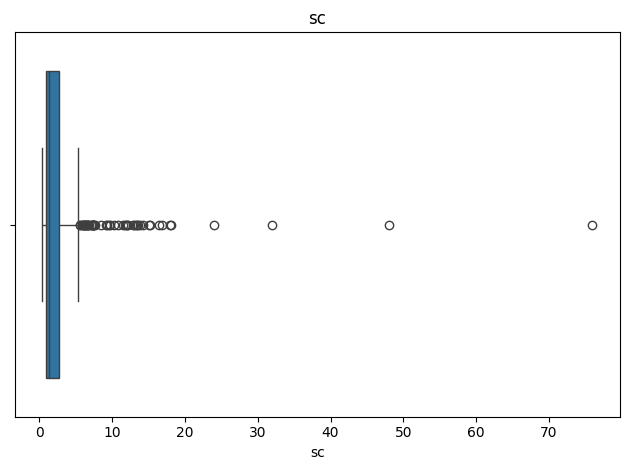

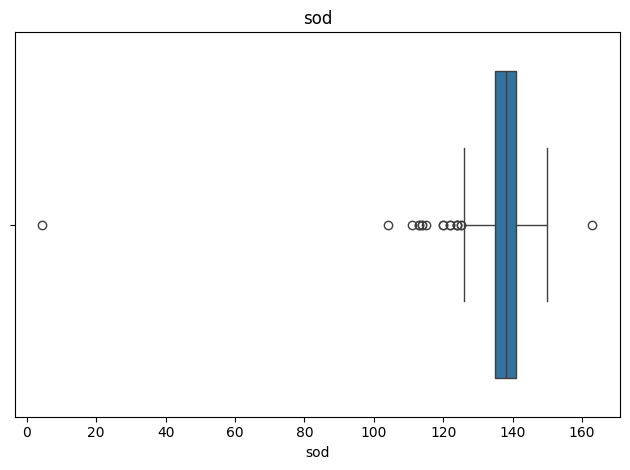

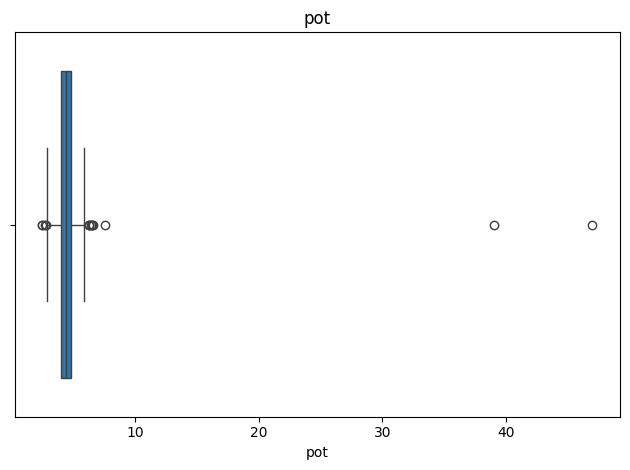

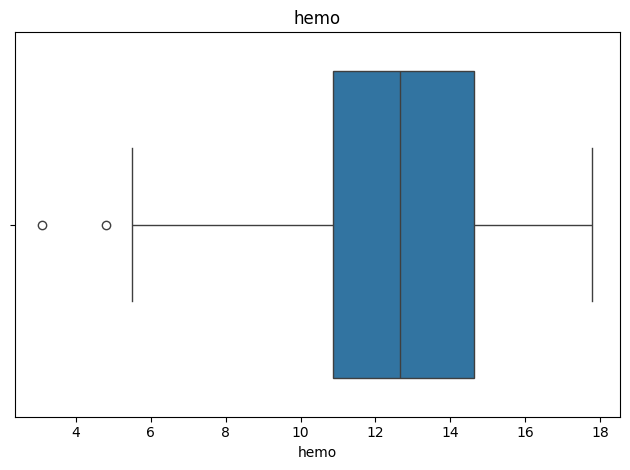

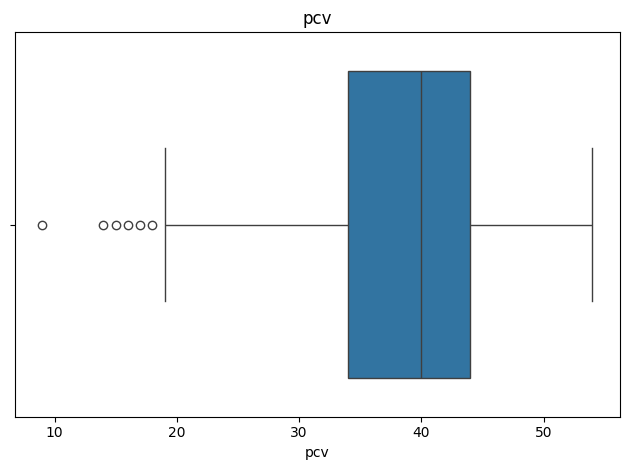

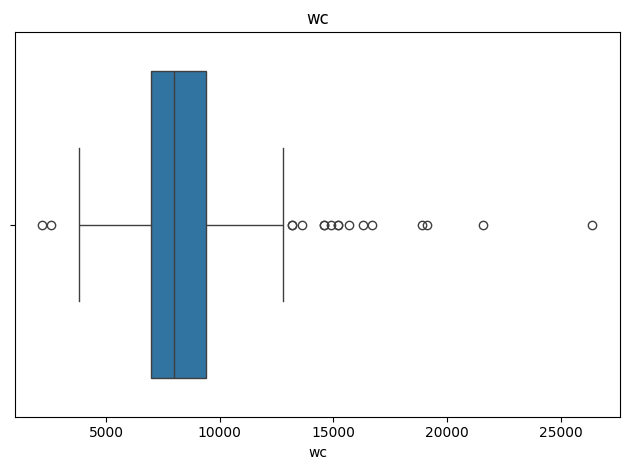

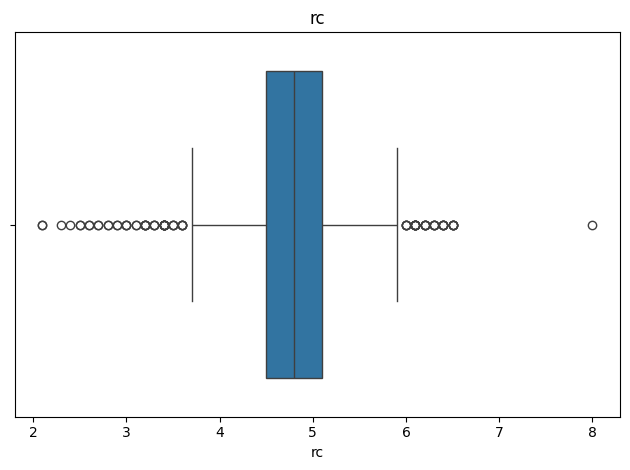

In [30]:
for i in df_imp2.columns:
    boxplots(i)

### Observation 
- outlier is there but it's medical section data so no need to do outlier treatement

## Merging both categorical and numerical variables

In [31]:
df_table = pd.concat([df_imp2 , df_imp1] , axis=1)

In [32]:
df_table

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


## Split the data into Dependent and independent variable 

In [33]:
x = df_table.drop(columns=['classification']) #Independent
y = df_table['classification'] #Dependent

In [34]:
x.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [35]:
y

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [36]:
y = np.where(y=='ckd', 1,0)

In [37]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Classifing the Features

In [38]:
def classify_feature(x):
    categorical_feature = []
    non_categori_feature = []
    discreate_feature = []
    continus_feature = []

    for column in x.columns:
        if x[column].dtype == 'object':
            if x[column].nunique() < 3:
                categorical_feature.append(column)
            else:
                non_categori_feature.append(column)
        elif x[column].dtype in ['Int64' , 'float64']:
            if x[column].nunique() < 10:
                discreate_feature.append(column)
            else:
                continus_feature.append(column)
    
    return categorical_feature , non_categori_feature, discreate_feature , continus_feature

In [39]:
categorical , non_categorical , discreate ,containous = classify_feature(x)

In [40]:
categorical 

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [41]:
non_categorical 

[]

In [42]:
discreate 

['sg', 'al', 'su']

In [43]:
containous

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

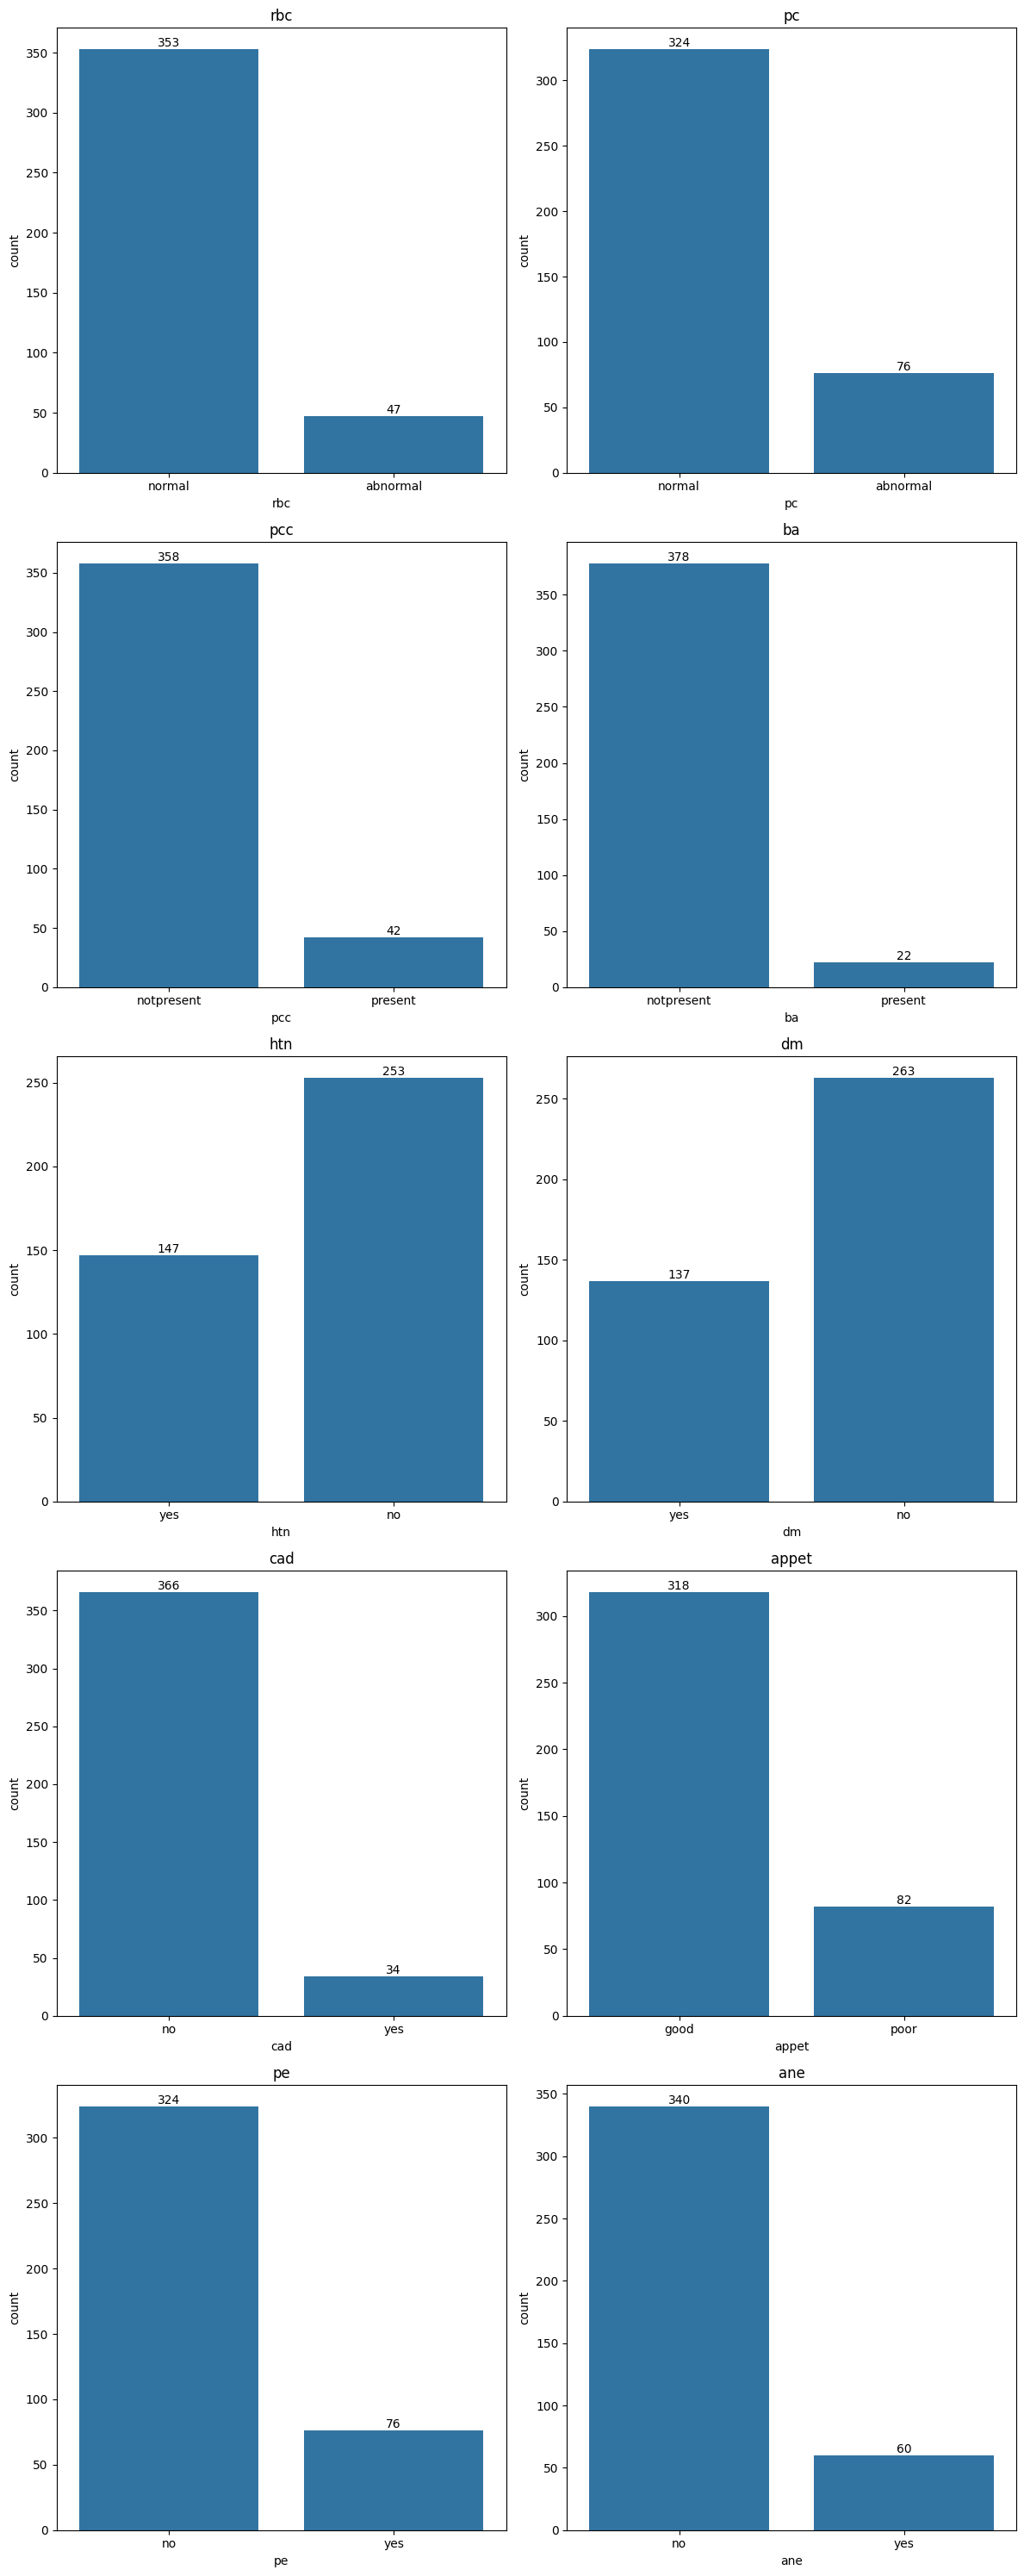

In [44]:
num_cols = 2  
num_rows = -(-len(categorical) // num_cols)  # Ceiling division to get number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))  # Adjust figure size as needed

for i, col in enumerate(categorical):
    ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]  # Handle 1-row case
    sns.countplot(x=x[col], ax=ax)
    ax.bar_label(ax.containers[0])
    ax.set_title(col)
plt.tight_layout()
plt.show()

### Observation 

There are only 2 unique values in each variable so either do One-Hot Encoder or Label Encoder

## One Hot Encoder

In [45]:
df_dummies = pd.get_dummies(x[categorical] , columns=categorical , drop_first=True)

In [46]:
df_dummies_columns = df_dummies.columns
df_dummies.head()

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,True,True,False,False,True,True,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False
2,True,True,False,False,False,True,False,True,False,True
3,True,False,True,False,True,False,False,True,True,True
4,True,True,False,False,False,False,False,False,False,False


## Convert True = 1 & False = 0

In [47]:
df_dummies = np.where(df_dummies[0:]==True , 1 , 0)
df_dummies

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [48]:
df_dummies = pd.DataFrame(df_dummies , columns=df_dummies_columns)
df_dummies.head()

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,1,1,0,0,1,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1
3,1,0,1,0,1,0,0,1,1,1
4,1,1,0,0,0,0,0,0,0,0


## Concate (replace categorical variable with dummies variable)

In [49]:
df1 = pd.concat([x.drop(columns=categorical) , df_dummies] ,axis=1)

In [50]:
df1.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0


In [51]:
df1.dtypes

age            float64
bp             float64
sg             float64
al             float64
su             float64
bgr            float64
bu             float64
sc             float64
sod            float64
pot            float64
hemo           float64
pcv            float64
wc             float64
rc             float64
rbc_normal       int32
pc_normal        int32
pcc_present      int32
ba_present       int32
htn_yes          int32
dm_yes           int32
cad_yes          int32
appet_poor       int32
pe_yes           int32
ane_yes          int32
dtype: object

## Description of Data

In [52]:
df1.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,...,0.882500,0.810000,0.105000,0.055000,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,...,0.322418,0.392792,0.306937,0.228266,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [53]:
df1[["hemo", "pcv", "wc", "rc"]].describe()

,hemo,pcv,wc,rc
count,400.00000,400.00000,400.000000,400.000000
mean,12.54250,39.08500,8303.000000,4.738750
std,2.71649,8.16268,2530.662291,0.841751
min,3.10000,9.00000,2200.000000,2.100000
25%,10.87500,34.00000,6975.000000,4.500000
50%,12.65000,40.00000,8000.000000,4.800000
75%,14.62500,44.00000,9400.000000,5.100000
max,17.80000,54.00000,26400.000000,8.000000


# preprocessing part very very important 
1. part 1 - missing value treatement done
2. part 2 - encoding part done (char variable only)
3. part 3 - outlier treatement - not required (numerical variable only)
4. part 4 - Feature scaling (normalization or standarization) - depends basis the result
5. part 5 - Imbalance treatement (this is only application with classification problem)

## Imbalance Treatement

In [54]:
pd.DataFrame(y).value_counts(normalize=True)

1    0.625
0    0.375
Name: proportion, dtype: float64

Not required

## Train Test Split

In [55]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(df1 , y , test_size=0.2 ,random_state=42 , stratify=y)

In [56]:
x_train.shape ,x_test.shape , y_train.shape ,y_test.shape

((320, 24), (80, 24), (320,), (80,))

## Building Machine Learning Algorithm

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
# evaluation matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

      Method Used  Accuracy
0  LogitRegession    0.8625
1           Dtree    0.9750
2         RForest    1.0000
3             XGB    0.9875
4             KNN    0.6750
5             SVM    0.6250
6             NBT    0.9750
7          Voting    1.0000
Axes(0.125,0.11;0.775x0.77)


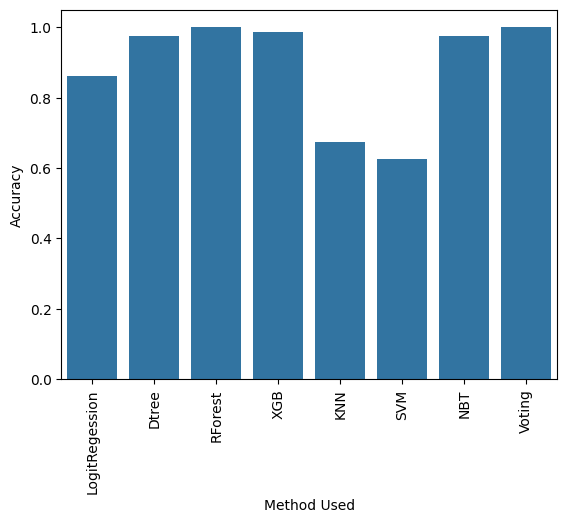

In [58]:

# LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test) 
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rforest = RandomForestClassifier()
rforest = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier()
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
 
# SVM
svm = SVC()
svm = svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Based Theorem
nbt = GaussianNB()
nbt = nbt.fit(x_train, y_train)
y_pred_nbt = nbt.predict(x_test)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)

# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc = VotingClassifier(estimators = [('logit',logit), ('dtree',dtree), ('rforest',rforest),('xgboost',xgboost),
                                           ('knn',knn),('svm',svm),('nbt',nbt)])
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogitRegession','Dtree','RForest','XGB','KNN','SVM','NBT','Voting']
list2 = [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_xg,accuracy_knn,accuracy_svm,accuracy_nbt,accuracy_evc]
list3 = [logit,dtree,rforest,xgboost,knn,svm,nbt,model_evc]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)                          
                               

### Observation 
- Voting giving more accurate result

## Check underfitting and overfitting problem (high bias or high variance problem)- Bias-Variance Trade off

In [59]:
pred_evc_train = model_evc.predict(x_train)
pred_evc_test = model_evc.predict(x_test)
accuracy_evc_train = accuracy_score(y_train, pred_evc_train)
accuracy_evc_test = accuracy_score(y_test, pred_evc_test)

print("************************")
print("Training Accuracy :",accuracy_evc_train)
print("************************")
print("Test Accuracy :",accuracy_evc_test)

************************
Training Accuracy : 1.0
************************
Test Accuracy : 1.0


## Cross Validation 

In [60]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(model_evc , x_train , y_train , cv=10)

In [61]:
training.mean()

0.9875

## Evaluation Matric

In [62]:
from sklearn.metrics import classification_report , confusion_matrix
print("************************")
print("Training :",classification_report(y_train, pred_evc_train))
print("************************")
print("Test :",classification_report(y_test, pred_evc_test))

************************
Training :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       200

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

************************
Test :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [63]:
print('Train')
print(confusion_matrix(y_train, pred_evc_train))
print()
print("Test")
print(confusion_matrix(y_test, pred_evc_test))

Train
[[120   0]
 [  0 200]]

Test
[[30  0]
 [ 0 50]]


## Deployment 

In [ ]:
# import pickle
# pickle_out = open("classifer.pkl" , "wb")
# pickle.dump(model_evc ,pickle_out)
# pickle_out.close()

In [ ]:
# import pickle
# pickle_out = open("randomforest.pkl" , "wb")
# pickle.dump(rforest ,pickle_out)
# pickle_out.close()